In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data= pd.read_csv("/content/drive/MyDrive/Mini_Project_BrainStroke/Dataset /updated_dataset.csv")
data.head(7)

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False
5,5,81.0,0,0,186.21,29.000000,1,True,False,True,False,True,False,False,True,True,False,False
6,6,74.0,1,1,70.09,27.400000,1,True,False,True,False,True,False,False,False,False,True,False


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data.stroke.value_counts()

,count
stroke,
1,4861
0,4861


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9722 non-null   float64
 1   hypertension                    9722 non-null   int64  
 2   heart_disease                   9722 non-null   int64  
 3   avg_glucose_level               9722 non-null   float64
 4   bmi                             9722 non-null   float64
 5   stroke                          9722 non-null   int64  
 6   gender_Male                     9722 non-null   bool   
 7   gender_Other                    9722 non-null   bool   
 8   ever_married_Yes                9722 non-null   bool   
 9   work_type_Never_worked          9722 non-null   bool   
 10  work_type_Private               9722 non-null   bool   
 11  work_type_Self-employed         9722 non-null   bool   
 12  work_type_children              97

## Split data to test and train

In [6]:
x = data.drop("stroke", axis=1)
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,False,False,True,False,False,True,False,False,False,True,False


In [7]:
y = data[['stroke']]
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [10]:
x

array([[ 0.54340716, -0.45919563,  2.68277876, ...,  1.88228336,
        -0.76278558, -0.43835152],
       [ 0.2735194 , -0.45919563, -0.37274784, ..., -0.53126964,
         1.3109844 , -0.43835152],
       [ 1.12816399, -0.45919563,  2.68277876, ..., -0.53126964,
         1.3109844 , -0.43835152],
       ...,
       [ 0.13857551, -0.45919563, -0.37274784, ..., -0.53126964,
        -0.76278558, -0.43835152],
       [ 0.72333234, -0.45919563, -0.37274784, ..., -0.53126964,
        -0.76278558,  2.28127418],
       [ 0.18355681, -0.45919563, -0.37274784, ...,  1.88228336,
        -0.76278558, -0.43835152]])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [12]:
x_train

array([[-0.04134966, -0.45919563, -0.37274784, ..., -0.53126964,
        -0.76278558,  2.28127418],
       [ 1.0382014 , -0.45919563, -0.37274784, ...,  1.88228336,
        -0.76278558, -0.43835152],
       [ 0.81329493, -0.45919563, -0.37274784, ..., -0.53126964,
         1.3109844 , -0.43835152],
       ...,
       [ 0.2735194 , -0.45919563, -0.37274784, ..., -0.53126964,
         1.3109844 , -0.43835152],
       [-0.40120002, -0.45919563, -0.37274784, ..., -0.53126964,
        -0.76278558,  2.28127418],
       [ 1.17314529,  2.17772105, -0.37274784, ..., -0.53126964,
         1.3109844 , -0.43835152]])

In [13]:
y_train

,stroke
5011,0
6550,1
7395,1
847,0
938,0
...,...
5734,1
5191,1
5390,1
860,0


# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=1)
decision.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
print("Accuracy is :")
decision.score(x_test, y_test)

Accuracy is :


0.9725771268307885

In [16]:
prep = decision.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prep))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1604
           1       0.95      1.00      0.97      1605

    accuracy                           0.97      3209
   macro avg       0.97      0.97      0.97      3209
weighted avg       0.97      0.97      0.97      3209



In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prep)

0.027422873169211593

In [19]:
from sklearn.metrics import log_loss

y_pred_proba = decision.predict_proba(x_test)
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss}")

Log Loss: 0.9884205354447835


## Confusion Matrix

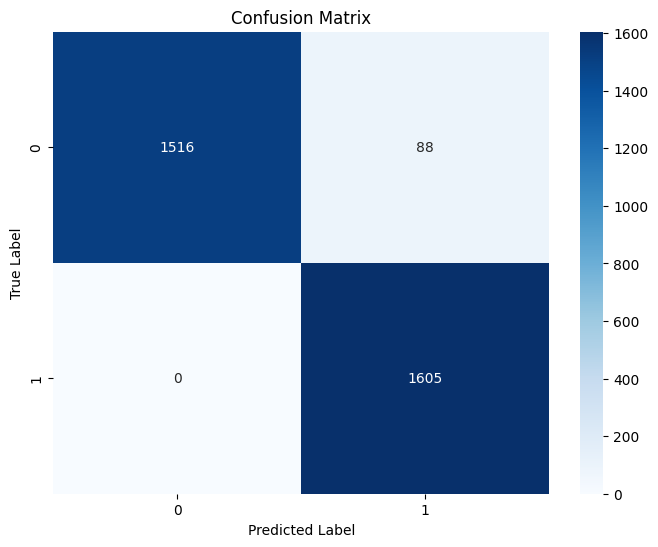

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, prep, labels=[0,1])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
class_labels = {0, 1}

In [22]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

## Prediction using Raw data

In [23]:
import pandas as pd


models = {
    "Decision Tree": decision
}

# Define the labels for prediction
class_labels = {0: "No Stroke", 1: "Stroke"}

user_data_list = [

    [[55, 0, 0, 105.5, 23.5, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]],
    [[45, 1, 1, 80.3, 27.8, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]],

]

# Iterate through each user data and make predictions
for user_data in user_data_list:
    print(f"Testing on data: {user_data}")
    for model_name, model in models.items():
        # Convert test data to DataFrame with correct column names
        user_data_df = pd.DataFrame(user_data, columns=[
            'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
           'gender_Male', 'gender_Other', 'ever_married_Yes',
            'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed',
            'work_type_children', 'Residence_type_Urban',
            'smoking_status_formerly smoked', 'smoking_status_never smoked',
            'smoking_status_smokes'
        ])

        # Make prediction
        prediction = model.predict(user_data_df)
        class_label = class_labels[prediction[0]]
        print(f"{model_name} Prediction: {prediction[0]} - {class_label}")
    print("\n")

Testing on data: [[55, 0, 0, 105.5, 23.5, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]]
Decision Tree Prediction: 0 - No Stroke


Testing on data: [[45, 1, 1, 80.3, 27.8, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]]
Decision Tree Prediction: 0 - No Stroke




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [24]:
import pandas as pd

# Assuming rf is your trained RandomForestClassifier model
models = {
    "Decision Tree": decision
}

# Define the labels for prediction
class_labels = {0: "No Stroke", 1: "Stroke"}

user_data_list = [
    [[70, 1, 1, 200.5, 75.5, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]],
    [[45, 1, 1, 80.3, 27.8, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]],
]

# Iterate through each user data and make predictions
for user_data in user_data_list:
    print(f"Testing on data: {user_data}")
    for model_name, model in models.items():
        # Convert test data to DataFrame with correct column names
        user_data_df = pd.DataFrame(user_data, columns=[
            'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
           'gender_Male', 'gender_Other', 'ever_married_Yes',
            'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed',
            'work_type_children', 'Residence_type_Urban',
            'smoking_status_formerly smoked', 'smoking_status_never smoked',
            'smoking_status_smokes'
        ])

        # Convert the DataFrame to a NumPy array to avoid the warning
        user_data_array = user_data_df.values

        # Make prediction using the NumPy array
        prediction = model.predict(user_data_array)
        class_label = class_labels[prediction[0]]
        print(f"{model_name} Prediction: {prediction[0]} - {class_label}")

Testing on data: [[70, 1, 1, 200.5, 75.5, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]]
Decision Tree Prediction: 0 - No Stroke
Testing on data: [[45, 1, 1, 80.3, 27.8, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]]
Decision Tree Prediction: 0 - No Stroke


## Save model

In [27]:
import pickle

pickle.dump(decision, open('decision_new.pkl', 'wb'))